In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import openpyxl
import matplotlib.pyplot as plt
import random 
%matplotlib inline

In [2]:
city="ams"
base_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("__file__")))))
print(base_dir)
# Paths for the Population Data --------------------------------------------------------------
#path to ancillary data folder
ancillary_data_folder_path = base_dir + "/data_prep/{}_Projectdata/AncillaryData".format(city)
ancillary_POPdata_folder_path = base_dir + "/data_prep/{}_Projectdata/PopData".format(city)
image_path= base_dir + "/data_prep/{}_Projectdata/PopData/images".format(city)
years_list=[1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016,2018] #

c:\FUME\PopNetV2


In [3]:
#Remove the standard columns from the unique Attributes and write file
select = [ 'Oceania', 'EuropeNotEU', 'EuropeEUnoLocal',  'Central_Asia', 'Eastern_Asia', 'Southern-Eastern_Asia', 'Southern_Asia', 
'Western_Asia', 'Northern_America', 'Latin_America_and_the_Caribbean', 'Northern_Africa', 'Sub-Saharan_Africa', 'Others', 'Colonies']  

In [4]:
frame = pd.DataFrame(columns=select)
year = ['1992','1994','1996','1998','2000','2002','2004','2006','2008','2010','2012','2014','2016','2018']
frame['Year'] = year

In [5]:
nframe= frame.set_index('Year')
print(nframe)

     Oceania EuropeNotEU EuropeEUnoLocal Central_Asia Eastern_Asia  \
Year                                                                 
1992     NaN         NaN             NaN          NaN          NaN   
1994     NaN         NaN             NaN          NaN          NaN   
1996     NaN         NaN             NaN          NaN          NaN   
1998     NaN         NaN             NaN          NaN          NaN   
2000     NaN         NaN             NaN          NaN          NaN   
2002     NaN         NaN             NaN          NaN          NaN   
2004     NaN         NaN             NaN          NaN          NaN   
2006     NaN         NaN             NaN          NaN          NaN   
2008     NaN         NaN             NaN          NaN          NaN   
2010     NaN         NaN             NaN          NaN          NaN   
2012     NaN         NaN             NaN          NaN          NaN   
2014     NaN         NaN             NaN          NaN          NaN   
2016     NaN        

In [6]:
for year in years_list:
    pathI = ancillary_POPdata_folder_path + "/{0}/{0}.xlsx".format(year)
    dfI = pd.read_excel(pathI, header=0 )
    for x in select: 
        if x in dfI.columns:
            nframe.at['{}'.format(year), x ] = dfI['{}'.format(x)].sum()
        else:
            nframe.at['{}'.format(year), x ] = 0 

In [8]:
nframe

,Oceania,EuropeNotEU,EuropeEUnoLocal,Central_Asia,Eastern_Asia,Southern-Eastern_Asia,Southern_Asia,Western_Asia,Northern_America,Latin_America_and_the_Caribbean,Northern_Africa,Sub-Saharan_Africa,Others,Colonies
Year,,,,,,,,,,,,,,
1992,1072,78,28407,0,4178,4618,5585,22244,3513,50665,31445,6629,4271,11835
1994,1158,72,29777,0,4576,5257,6562,23021,3993,57475,33914,8197,5226,12290
1996,1076,78,26990,0,4392,5242,7134,22304,3792,57204,33467,9070,6021,11531
1998,1165,83,28619,1,4547,5530,8176,23875,4411,58074,35606,10680,6547,11083
2000,1451,96,30242,2,4828,5789,9336,24946,5008,58354,37591,12119,7016,10625
2002,1688,128,31169,5,5173,6218,9880,25931,5335,58406,39404,13313,7360,10129
2004,1794,130,32483,7,5821,6624,10040,26580,5696,57945,40659,13766,7850,9586
2006,1713,128,32010,4,5709,6722,10470,26181,5767,56551,40270,13431,7867,8935
2008,1715,169,36432,6,6091,6990,10822,26367,6197,56411,39890,13899,8504,8318


In [7]:
# Create a Pandas Excel writer using XlsxWriter as the engine
writer = pd.ExcelWriter(ancillary_POPdata_folder_path + "/EXCEL/00SumsByRegion.xlsx",  index = False, header=True)
# Convert the dataframe to an XlsxWriter Excel object.
nframe.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [12]:
df = pd.read_excel(ancillary_POPdata_folder_path + "/EXCEL/00SumsByRegion.xlsx", header=0)
print(df.head())
ndf = df.set_index('Year')
print(ndf.head())

   Year  Oceania  EuropeNotEU  EuropeEUnoLocal  Central_Asia  Eastern_Asia  \
0  1992     1072           78            28407             0          4178   
1  1994     1158           72            29777             0          4576   
2  1996     1076           78            26990             0          4392   
3  1998     1165           83            28619             1          4547   
4  2000     1451           96            30242             2          4828   

   Southern-Eastern_Asia  Southern_Asia  Western_Asia  Northern_America  \
0                   4618           5585         22244              3513   
1                   5257           6562         23021              3993   
2                   5242           7134         22304              3792   
3                   5530           8176         23875              4411   
4                   5789           9336         24946              5008   

   Latin_America_and_the_Caribbean  Northern_Africa  Sub-Saharan_Africa  \
0    

In [28]:
L_select = [ 'EuropeEUnoLocal',  'Eastern_Asia', 'Southern-Eastern_Asia', 'Southern_Asia', 
'Western_Asia', 'Northern_America', 'Latin_America_and_the_Caribbean', 'Northern_Africa', 'Sub-Saharan_Africa', 'Others', 'Colonies']

In [32]:
lframe = ndf.loc[:, L_select]
lframe

,EuropeEUnoLocal,Eastern_Asia,Southern-Eastern_Asia,Southern_Asia,Western_Asia,Northern_America,Latin_America_and_the_Caribbean,Northern_Africa,Sub-Saharan_Africa,Others,Colonies
Year,,,,,,,,,,,
1992,28407,4178,4618,5585,22244,3513,50665,31445,6629,4271,11835
1994,29777,4576,5257,6562,23021,3993,57475,33914,8197,5226,12290
1996,26990,4392,5242,7134,22304,3792,57204,33467,9070,6021,11531
1998,28619,4547,5530,8176,23875,4411,58074,35606,10680,6547,11083
2000,30242,4828,5789,9336,24946,5008,58354,37591,12119,7016,10625
2002,31169,5173,6218,9880,25931,5335,58406,39404,13313,7360,10129
2004,32483,5821,6624,10040,26580,5696,57945,40659,13766,7850,9586
2006,32010,5709,6722,10470,26181,5767,56551,40270,13431,7867,8935
2008,36432,6091,6990,10822,26367,6197,56411,39890,13899,8504,8318


In [20]:
# A function creating random colors
def generate_colors(n): 
  rgb_values = [] 
  hex_values = [] 
  r = int(random.random() * 256) 
  g = int(random.random() * 256) 
  b = int(random.random() * 256) 
  step = 256 / n 
  for _ in range(n): 
    r += 25 #originally all += step
    g += 46 
    b += 125 
    r = int(r) % 256 
    g = int(g) % 256 
    b = int(b) % 256 
    r_hex = hex(r)[2:] 
    g_hex = hex(g)[2:] 
    b_hex = hex(b)[2:] 
    hex_number = "#%02x%02x%02x" % ((r,g,b))
    hex_values.append(hex_number) 
    rgb_values.append((r,g,b)) 
  return  hex_values #rgb_values,
 

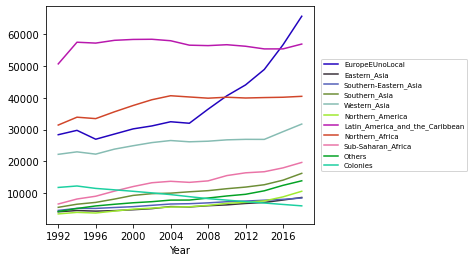

In [50]:
ax = plt.gca()
# Shink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# generate values and print them 
hex_values = generate_colors(len(L_select)) 
lines = [] 
for i, country in enumerate(lframe):
    #lines = nframe[i].plot(kind='line', x='Year', y='Population',ax=ax, ylabel='Population', title ='Population Change of Migrant Groups (1992-2018)', color='green')  
    axes = nframe[country].plot.line(color={ "{}".format(country): "{}".format(hex_values[i])})
plt.legend(bbox_to_anchor=(1.3,0.5), loc='center', borderaxespad=0., fontsize=7)
plt.savefig(image_path + '/PopChangeByGeogRegion.png', dpi=300)
plt.show()

## Get the 15 larger migrant populations

In [39]:
country_df = pd.read_excel(ancillary_POPdata_folder_path + "/EXCEL/00SumClean.xlsx", header=0)
#print(country_df.head())
country_ndf = country_df.iloc[:, 2:].set_index('Year')
#print(country_ndf.head())

In [46]:
def lineDiagram(frame, outputName, n):
    ax = plt.gca()
    # Shink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # generate values and print them 
    hex_values = generate_colors(len(frame.columns)) 
    lines = [] 
    for i, country in enumerate(frame):
        #lines = nframe[i].plot(kind='line', x='Year', y='Population',ax=ax, ylabel='Population', title ='Population Change of Migrant Groups (1992-2018)', color='green')  
        axes = frame[country].plot.line(color={ "{}".format(country): "{}".format(hex_values[i])})
    plt.legend(bbox_to_anchor=(1.3,0.5), loc='center', borderaxespad=0., fontsize=7)
    plt.savefig(image_path + '/{}.png'.format(outputName), dpi=300)
    plt.show()

In [49]:
gdf = country_ndf.iloc[-1, 23:].nlargest(16)
gdf.iloc[1:]
selectList= gdf.index.to_list()
top15 = country_ndf.loc[: ,selectList]
top15.drop('L10_NLD', inplace=True, axis=1)

In [50]:
top15

,L10_SUR,L10_MAR,L10_TUR,L10_GBR,L40_DEU,L40_OTH,L10_USA,L10_ITA,L10_GHA,L10_ANT,L10_FRA,L10_IND,L40_CHN,L40_ESP,L40_YUG
Year,,,,,,,,,,,,,,,
1992,49645,29162,21123,6452,8286,1835,3080,2135,3188,8489,1957,1582,1586,2239,2746
1994,52096,30046,20733,6349,8072,2008,3350,2154,3779,8108,2100,1647,1573,2250,3307
1996,51796,29788,19497,5274,7143,2313,3132,2009,3953,8095,1999,1668,1524,2149,3742
1998,52021,31400,20342,5727,7187,2707,3657,2200,4638,8494,2268,1936,1690,2258,3859
2000,51653,32883,21047,6395,7177,3094,4192,2400,5264,9032,2531,2050,1846,2374,3944
2002,50989,34280,21710,6799,7230,3422,4452,2488,5666,8967,2650,2087,2185,2375,3963
2004,49786,35306,22113,6966,7386,3884,4775,2648,5986,8692,2804,2143,2601,2470,3980
2006,48027,34964,21842,6658,7288,3991,4800,2725,6094,8262,2858,2573,2567,2291,3882
2008,47187,34566,21935,6934,7648,4586,5092,3159,6214,8286,3319,3005,2943,2567,3928


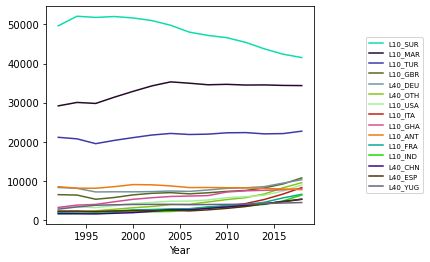

In [51]:
outputName = "15LargestCountries"
lineDiagram(top15, outputName, n)

## Get the 15 largest groups with population <10.000

In [56]:
gdf = country_ndf.iloc[-1, 23:].nlargest(19)
gdf.iloc[1:]
selectList= gdf.index.to_list()
top15 = country_ndf.loc[: ,selectList]
top15.drop('L10_NLD', inplace=True, axis=1)
top15.drop('L10_SUR', inplace=True, axis=1)
top15.drop('L10_TUR', inplace=True, axis=1)
top15.drop('L10_MAR', inplace=True, axis=1)

In [57]:
top15

,L10_GBR,L40_DEU,L40_OTH,L10_USA,L10_ITA,L10_GHA,L10_ANT,L10_FRA,L10_IND,L40_CHN,L40_ESP,L40_YUG,L10_BRA,L10_BGR,L10_POL
Year,,,,,,,,,,,,,,,
1992,6452,8286,1835,3080,2135,3188,8489,1957,1582,1586,2239,2746,801,93,996
1994,6349,8072,2008,3350,2154,3779,8108,2100,1647,1573,2250,3307,866,103,940
1996,5274,7143,2313,3132,2009,3953,8095,1999,1668,1524,2149,3742,891,108,861
1998,5727,7187,2707,3657,2200,4638,8494,2268,1936,1690,2258,3859,1038,174,929
2000,6395,7177,3094,4192,2400,5264,9032,2531,2050,1846,2374,3944,1139,211,981
2002,6799,7230,3422,4452,2488,5666,8967,2650,2087,2185,2375,3963,1279,288,1060
2004,6966,7386,3884,4775,2648,5986,8692,2804,2143,2601,2470,3980,1395,388,1448
2006,6658,7288,3991,4800,2725,6094,8262,2858,2573,2567,2291,3882,1582,424,2025
2008,6934,7648,4586,5092,3159,6214,8286,3319,3005,2943,2567,3928,1863,1622,2468


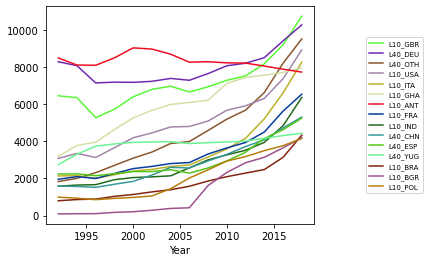

In [58]:
outputName = "15LCountries"
lineDiagram(top15, outputName, n)